## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.155998  0.959260  1.667084  0.709570 -0.695739  1.736154
1  1.595876  0.005689 -0.282195 -1.424664 -0.089200 -0.378816
2 -0.633051 -1.979426 -0.492275  1.043348 -0.859847 -1.034294
3 -1.459326  0.711093  0.889527  0.982125 -1.327194 -0.744497
4 -0.398146  0.769905 -0.964688 -0.508737 -1.513093 -0.325154


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0397638	total: 66.6ms	remaining: 1m 6s
1:	learn: 1.0280593	total: 67.2ms	remaining: 33.5s
2:	learn: 1.0173396	total: 67.8ms	remaining: 22.5s
3:	learn: 1.0067273	total: 68.3ms	remaining: 17s
4:	learn: 1.0000519	total: 68.9ms	remaining: 13.7s
5:	learn: 0.9897142	total: 69.4ms	remaining: 11.5s
6:	learn: 0.9803371	total: 69.9ms	remaining: 9.92s
7:	learn: 0.9698852	total: 70.4ms	remaining: 8.73s
8:	learn: 0.9631717	total: 71ms	remaining: 7.82s
9:	learn: 0.9558824	total: 71.6ms	remaining: 7.09s
10:	learn: 0.9459634	total: 72ms	remaining: 6.48s
11:	learn: 0.9380140	total: 72.5ms	remaining: 5.97s
12:	learn: 0.9282667	total: 73ms	remaining: 5.54s
13:	learn: 0.9210921	total: 73.5ms	remaining: 5.18s
14:	learn: 0.9140406	total: 74.2ms	remaining: 4.87s
15:	learn: 0.9079052	total: 74.7ms	remaining: 4.59s
16:	learn: 0.9003593	total: 75.2ms	remaining: 4.35s
17:	learn: 0.8936616	total: 75.7ms	remaining: 4.13s
18:	learn: 0.8852812	total: 76.1ms	remaining: 3.93s


91:	learn: 0.4939615	total: 109ms	remaining: 1.07s
92:	learn: 0.4906288	total: 109ms	remaining: 1.06s
93:	learn: 0.4867928	total: 110ms	remaining: 1.06s
94:	learn: 0.4832128	total: 110ms	remaining: 1.05s
95:	learn: 0.4796387	total: 111ms	remaining: 1.04s
96:	learn: 0.4759885	total: 111ms	remaining: 1.03s
97:	learn: 0.4727887	total: 111ms	remaining: 1.02s
98:	learn: 0.4692261	total: 112ms	remaining: 1.02s
99:	learn: 0.4662125	total: 112ms	remaining: 1.01s
100:	learn: 0.4631174	total: 113ms	remaining: 1s
101:	learn: 0.4598303	total: 113ms	remaining: 995ms
102:	learn: 0.4559479	total: 113ms	remaining: 988ms
103:	learn: 0.4535023	total: 114ms	remaining: 980ms
104:	learn: 0.4503947	total: 114ms	remaining: 974ms
105:	learn: 0.4469787	total: 115ms	remaining: 967ms
106:	learn: 0.4431974	total: 115ms	remaining: 961ms
107:	learn: 0.4408194	total: 116ms	remaining: 955ms
108:	learn: 0.4375562	total: 116ms	remaining: 949ms
109:	learn: 0.4346353	total: 117ms	remaining: 943ms
110:	learn: 0.4313777	to

257:	learn: 0.1653847	total: 187ms	remaining: 538ms
258:	learn: 0.1642355	total: 188ms	remaining: 537ms
259:	learn: 0.1631678	total: 188ms	remaining: 536ms
260:	learn: 0.1621505	total: 189ms	remaining: 534ms
261:	learn: 0.1612238	total: 189ms	remaining: 533ms
262:	learn: 0.1602515	total: 189ms	remaining: 531ms
263:	learn: 0.1590490	total: 190ms	remaining: 530ms
264:	learn: 0.1582397	total: 191ms	remaining: 529ms
265:	learn: 0.1571305	total: 191ms	remaining: 527ms
266:	learn: 0.1558634	total: 191ms	remaining: 526ms
267:	learn: 0.1552222	total: 192ms	remaining: 524ms
268:	learn: 0.1544402	total: 192ms	remaining: 523ms
269:	learn: 0.1534307	total: 193ms	remaining: 521ms
270:	learn: 0.1523456	total: 193ms	remaining: 520ms
271:	learn: 0.1512494	total: 194ms	remaining: 518ms
272:	learn: 0.1503885	total: 194ms	remaining: 517ms
273:	learn: 0.1495628	total: 195ms	remaining: 517ms
274:	learn: 0.1485218	total: 195ms	remaining: 515ms
275:	learn: 0.1475626	total: 196ms	remaining: 514ms
276:	learn: 

479:	learn: 0.0469620	total: 292ms	remaining: 316ms
480:	learn: 0.0467500	total: 293ms	remaining: 316ms
481:	learn: 0.0464925	total: 293ms	remaining: 315ms
482:	learn: 0.0462857	total: 294ms	remaining: 314ms
483:	learn: 0.0460352	total: 294ms	remaining: 314ms
484:	learn: 0.0459130	total: 295ms	remaining: 313ms
485:	learn: 0.0457117	total: 295ms	remaining: 312ms
486:	learn: 0.0454687	total: 296ms	remaining: 312ms
487:	learn: 0.0452244	total: 296ms	remaining: 311ms
488:	learn: 0.0449968	total: 297ms	remaining: 310ms
489:	learn: 0.0448038	total: 297ms	remaining: 309ms
490:	learn: 0.0446865	total: 298ms	remaining: 309ms
491:	learn: 0.0444536	total: 298ms	remaining: 308ms
492:	learn: 0.0441519	total: 299ms	remaining: 307ms
493:	learn: 0.0439342	total: 299ms	remaining: 306ms
494:	learn: 0.0437204	total: 300ms	remaining: 306ms
495:	learn: 0.0436030	total: 300ms	remaining: 305ms
496:	learn: 0.0434208	total: 301ms	remaining: 304ms
497:	learn: 0.0431304	total: 301ms	remaining: 304ms
498:	learn: 

639:	learn: 0.0229144	total: 371ms	remaining: 209ms
640:	learn: 0.0228417	total: 372ms	remaining: 208ms
641:	learn: 0.0227310	total: 372ms	remaining: 207ms
642:	learn: 0.0226376	total: 372ms	remaining: 207ms
643:	learn: 0.0225907	total: 373ms	remaining: 206ms
644:	learn: 0.0225461	total: 373ms	remaining: 206ms
645:	learn: 0.0225141	total: 374ms	remaining: 205ms
646:	learn: 0.0224705	total: 374ms	remaining: 204ms
647:	learn: 0.0223506	total: 375ms	remaining: 204ms
648:	learn: 0.0222394	total: 375ms	remaining: 203ms
649:	learn: 0.0221721	total: 376ms	remaining: 202ms
650:	learn: 0.0221182	total: 376ms	remaining: 202ms
651:	learn: 0.0220655	total: 376ms	remaining: 201ms
652:	learn: 0.0220233	total: 377ms	remaining: 200ms
653:	learn: 0.0219597	total: 377ms	remaining: 200ms
654:	learn: 0.0218448	total: 378ms	remaining: 199ms
655:	learn: 0.0217224	total: 378ms	remaining: 198ms
656:	learn: 0.0216719	total: 379ms	remaining: 198ms
657:	learn: 0.0216299	total: 379ms	remaining: 197ms
658:	learn: 

861:	learn: 0.0099176	total: 476ms	remaining: 76.2ms
862:	learn: 0.0098826	total: 476ms	remaining: 75.6ms
863:	learn: 0.0098719	total: 477ms	remaining: 75ms
864:	learn: 0.0098243	total: 477ms	remaining: 74.5ms
865:	learn: 0.0097722	total: 477ms	remaining: 73.9ms
866:	learn: 0.0097261	total: 478ms	remaining: 73.3ms
867:	learn: 0.0096920	total: 478ms	remaining: 72.8ms
868:	learn: 0.0096359	total: 479ms	remaining: 72.2ms
869:	learn: 0.0095858	total: 479ms	remaining: 71.6ms
870:	learn: 0.0095369	total: 480ms	remaining: 71ms
871:	learn: 0.0094752	total: 480ms	remaining: 70.5ms
872:	learn: 0.0094428	total: 480ms	remaining: 69.9ms
873:	learn: 0.0093886	total: 481ms	remaining: 69.3ms
874:	learn: 0.0093571	total: 481ms	remaining: 68.8ms
875:	learn: 0.0092975	total: 482ms	remaining: 68.2ms
876:	learn: 0.0092668	total: 482ms	remaining: 67.6ms
877:	learn: 0.0092473	total: 483ms	remaining: 67.1ms
878:	learn: 0.0092283	total: 483ms	remaining: 66.5ms
879:	learn: 0.0091965	total: 484ms	remaining: 66ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

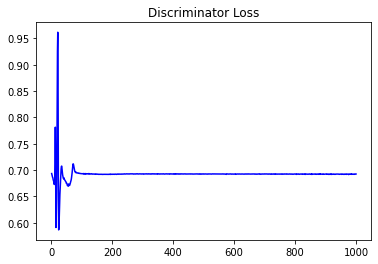

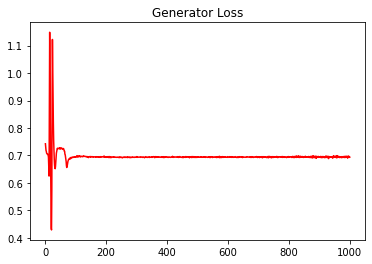

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2008560843069698


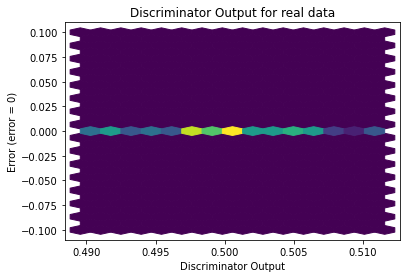

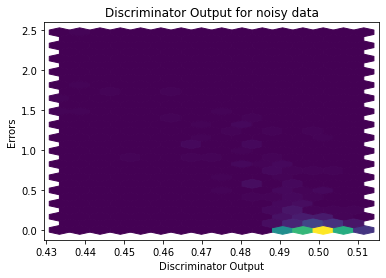

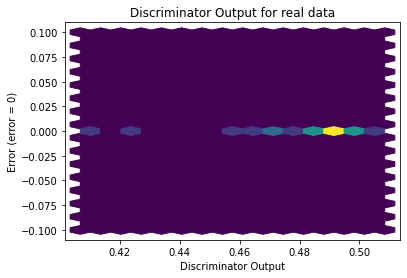

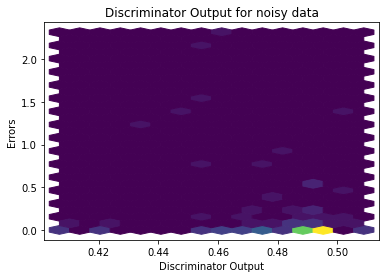

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


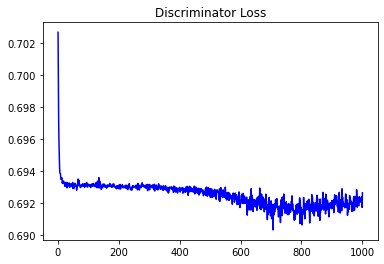

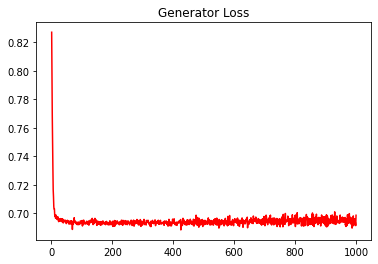

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.16807272163837347


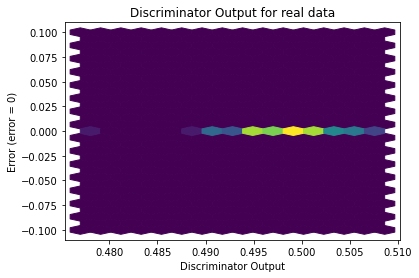

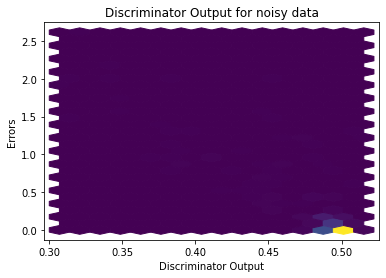

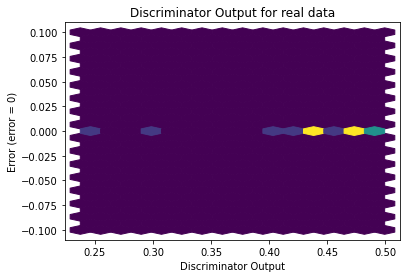

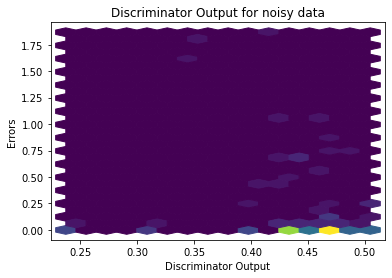

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1014]], requires_grad=True)
